In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

dfcab = pd.read_csv("Cab_Data.csv")
dfcab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
dfcab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [4]:
dfc = pd.read_csv("City.csv")
dfc


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [5]:
dfc.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [6]:
dfcus = pd.read_csv("Customer_ID.csv")
dfcus

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
dfcus.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [8]:
dftr= pd.read_csv("Transaction_ID.csv")
dftr

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [9]:
dftr.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [10]:
cols = dftr.columns.difference(dfcab.columns)
df = pd.merge(dfcab, dftr, on= 'Transaction ID',how='left')
df = pd.merge(df, dfcus, on= 'Customer ID', how = 'left')
df


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


In [11]:
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [12]:
df['profit_per_km'] = (df['Price Charged']- df['Cost of Trip'])/df['KM Travelled']
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit_per_km
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,1.882266
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,0.826904
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,3.049558
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,0.777751
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,1.929439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,1.225000
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,0.821667
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,3.150270
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,3.652500


In [13]:
df['Date of Travel']= df['Date of Travel'].astype('datetime64[ns]')
df['month'] = df['Date of Travel'].dt.month
df['year'] = df['Date of Travel'].dt.year
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit_per_km,month,year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,1.882266,1,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,0.826904,1,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,3.049558,1,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,0.777751,1,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,1.929439,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,1.225000,1,2018
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,0.821667,1,2018
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,3.150270,1,2018
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,3.652500,1,2018


In [14]:
avg_profit_per_km= df.groupby(['year', 'Company']).mean()['profit_per_km'].reset_index()
avg_profit_per_km

,year,Company,profit_per_km
0,2016,Pink Cab,3.026813
1,2016,Yellow Cab,7.489847
2,2017,Pink Cab,2.962883
3,2017,Yellow Cab,7.494612
4,2018,Pink Cab,2.350447
5,2018,Yellow Cab,6.364805


# H_0: Yellow cab makes more profit on per km.

<AxesSubplot:title={'center':'Avg profit per km yearly'}, xlabel='year'>

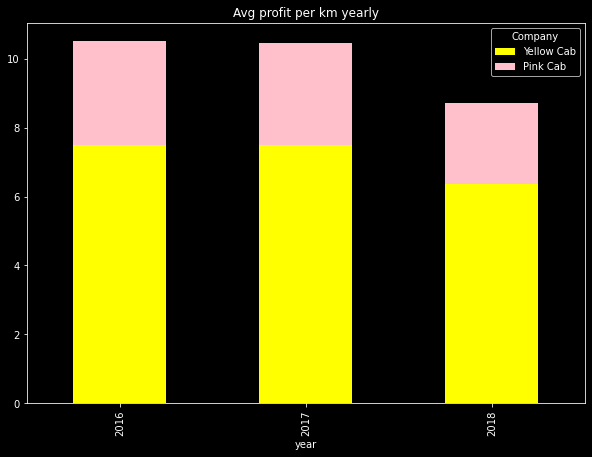

In [15]:
pivot_avg_profit = avg_profit_per_km.pivot(index='year', columns='Company', values='profit_per_km')
colors=["yellow", "pink"]
pivot_avg_profit.loc[:,['Yellow Cab','Pink Cab']].plot.bar(stacked=True, color=colors, figsize=(10,7),
                                                          title= "Avg profit per km yearly")


In [16]:
df['profit'] = df['Price Charged']- df['Cost of Trip']

# Due to population of NY
# H_0: NY most profitable

In [17]:
profit_city = pd.concat([df['Company'],df['City'],df['year'],df['profit']],axis=1)
profit_city = profit_city.groupby(['Company', 'City']).sum()['profit'].reset_index()
profit_city

,Company,City,profit
0,Pink Cab,ATLANTA GA,9.605008e+04
1,Pink Cab,AUSTIN TX,1.474453e+05
2,Pink Cab,BOSTON MA,2.620017e+05
3,Pink Cab,CHICAGO IL,3.187225e+05
4,Pink Cab,DALLAS TX,2.473011e+04
5,Pink Cab,DENVER CO,4.058494e+04
6,Pink Cab,LOS ANGELES CA,1.125732e+06
7,Pink Cab,MIAMI FL,1.623012e+05
8,Pink Cab,NASHVILLE TN,6.428453e+04
9,Pink Cab,NEW YORK NY,1.511474e+06


<AxesSubplot:title={'center':'Citywise profit'}, xlabel='City'>

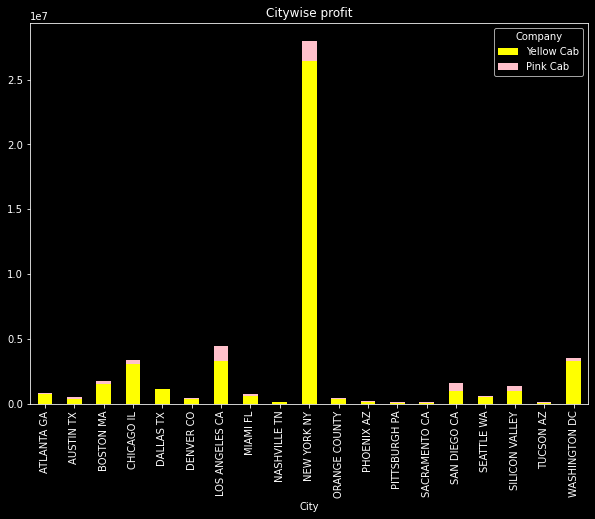

In [18]:
pivot_profit_city = profit_city.pivot(index='City', columns='Company',values='profit')
colors=["yellow", "pink"]
pivot_profit_city.loc[:,['Yellow Cab','Pink Cab']].plot.bar(stacked=True, color=colors, figsize=(10,7),
                                                          title= "Citywise profit")

# Profit vs Salary Segmantation

In [19]:
df['Income (USD/Month)'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

<AxesSubplot:title={'center':'Profit depending on customer salary'}, xlabel='Company'>

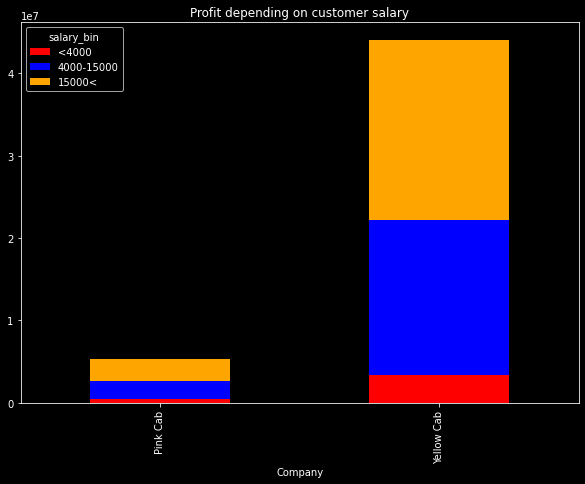

In [20]:
salary_bins = [0,4000, 15000,35000]
salary_bin_names = ['<4000','4000-15000', '15000<']
df['salary_bin'] = pd.cut(df['Income (USD/Month)'], salary_bins, labels=salary_bin_names)
profit_salary = pd.concat([df['Company'], df['profit'],df['salary_bin']],axis=1)
profit_salary = profit_salary.groupby(['Company', 'salary_bin']).sum()['profit'].reset_index()
profit_salary_pivot = profit_salary.pivot(index='Company', columns='salary_bin',values='profit')
colors=["red", "blue","orange"]
profit_salary_pivot.loc[:,['<4000','4000-15000','15000<']].plot.bar(stacked=True, color=colors, figsize=(10,7),
                                                          title= "Profit depending on customer salary")

# Profit vs Age Segmantation

In [21]:
df['Age'].describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

In [24]:
age_bins = [18,25,26,35,36,42,43,65]
age_bin_names = ['18-25','26-35','36-42','43<']
df['age_bin'] = pd.cut(df['Age'], age_bins, labels=age_bin_names)
profit_age = pd.concat([df['Company'], df['profit'],df['age_bin']],axis=1)
profit_age = profit_age.groupby(['Company', 'age_bin']).sum()['profit'].reset_index()
profit_age_pivot = profit_age.pivot(index='Company', columns='age_bin',values='profit')
colors=["red", "blue","orange"]
profit_age_pivot.loc[:,['18-25','26-35','36-42','43<']].plot.bar(stacked=True, color=colors, figsize=(10,7),
                                                          title= "Profit depending on customer age segment")

ValueError: Bin labels must be one fewer than the number of bin edges